In [41]:
from sklearn import tree
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score
from sklearn.model_selection import cross_val_score
%matplotlib inline

In [2]:
songs_df = pd.read_csv('https://stepik.org/media/attachments/course/4852/songs.csv')

In [3]:
songs_df

,song,year,artist,genre,lyrics,length,commas,exclamations,colons,hyphens
0,the-ownerz,2007,gangstarr,Hip-Hop,"""One-two..""\n""One-two, shots to the chin.. kno...",1300,24,5,0,11
1,dead-sound-of-misery,2006,blind-guardian,Metal,It's dark\nLet's do it now\nBring in the siren...,1566,0,0,0,0
2,modred-s-song,2006,blind-guardian,Metal,I've lost my battle before it starts\nmy first...,996,1,0,1,0
3,the-ninth-wave,2015,blind-guardian,Metal,As dark night embraces\nWe are the nation\nI w...,2868,5,0,0,0
4,skills,2014,gangstarr,Hip-Hop,"Skills, skills, skills\n""My Microphone""\n""It's...",3351,22,0,0,3
...,...,...,...,...,...,...,...,...,...,...
355,just-like-that,2006,abba,Pop,Until that day\nMy life had been a river\nFoll...,972,2,0,0,1
356,ring-ring,1995,abba,Pop,I was sitting by the phone\nI was waiting all ...,1283,33,0,0,3
357,reina-danzante,1981,abba,Pop,You can dance\nYou can jive\nHaving the time o...,810,1,0,0,0
358,code-of-the-streets,2006,gangstarr,Hip-Hop,Take this for example young brothers want rep\...,1996,34,0,0,5


In [4]:
X = songs_df.drop(['song', 'year', 'artist', 'genre', 'lyrics'], axis=1)

In [23]:
X

,length,commas,exclamations,colons,hyphens
0,1300,24,5,0,11
1,1566,0,0,0,0
2,996,1,0,1,0
3,2868,5,0,0,0
4,3351,22,0,0,3
...,...,...,...,...,...
355,972,2,0,0,1
356,1283,33,0,0,3
357,810,1,0,0,0
358,1996,34,0,0,5


In [6]:
y = songs_df.artist

In [24]:
y

0           gangstarr
1      blind-guardian
2      blind-guardian
3      blind-guardian
4           gangstarr
            ...      
355              abba
356              abba
357              abba
358         gangstarr
359              abba
Name: artist, Length: 360, dtype: object

In [63]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [64]:
max_depth_values = range(1, 100)

In [65]:
scores_data = pd.DataFrame()

In [66]:
for max_depth in max_depth_values:
    clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=max_depth)
    clf.fit(X_train, y_train)
    train_score = clf.score(X_train, y_train)
    test_score = clf.score(X_test, y_test)
    
    mean_cross_val_score = cross_val_score(clf, X_train, y_train, cv=5).mean()
    
    temp_score_data = pd.DataFrame({'max_depth' : [max_depth],
                                    'train_score' : [train_score],
                                    'test_score' : [test_score],
                                    'mean_cross_val_score' : mean_cross_val_score})
    scores_data = scores_data.append(temp_score_data)

In [67]:
scores_data.sort_values('mean_cross_val_score')

,max_depth,train_score,test_score,mean_cross_val_score
0,1,0.647303,0.563025,0.647194
0,40,0.995851,0.689076,0.660204
0,6,0.817427,0.647059,0.664116
0,31,0.995851,0.680672,0.664286
0,22,0.995851,0.689076,0.664286
...,...,...,...,...
0,90,0.995851,0.697479,0.717942
0,11,0.946058,0.621849,0.718027
0,80,0.995851,0.680672,0.718027
0,8,0.892116,0.714286,0.722024


In [68]:
scores_data_long = pd.melt(scores_data, id_vars='max_depth', value_vars=['train_score', 'test_score', 'mean_cross_val_score'],
                           var_name='set_type', value_name='score')

In [69]:
scores_data_long.query("set_type == 'mean_cross_val_score'").sort_values('score')

,max_depth,set_type,score
198,1,mean_cross_val_score,0.647194
237,40,mean_cross_val_score,0.660204
203,6,mean_cross_val_score,0.664116
228,31,mean_cross_val_score,0.664286
219,22,mean_cross_val_score,0.664286
...,...,...,...
287,90,mean_cross_val_score,0.717942
208,11,mean_cross_val_score,0.718027
277,80,mean_cross_val_score,0.718027
205,8,mean_cross_val_score,0.722024


In [71]:
sns.set(rc={'figure.figsize':(15,10)})

<AxesSubplot:xlabel='max_depth', ylabel='score'>

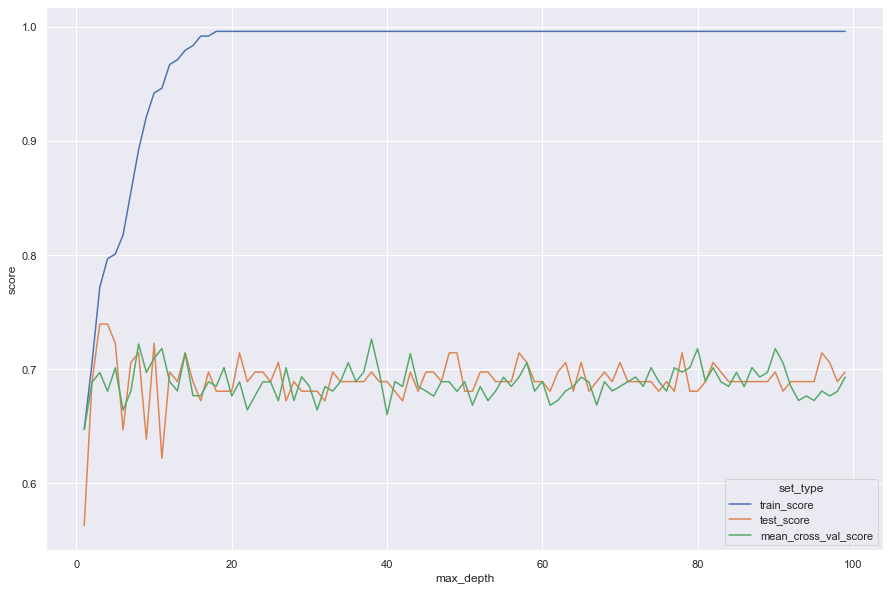

In [72]:
sns.lineplot(x='max_depth', y='score', hue='set_type', data=scores_data_long)

In [51]:
best_clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=46)

In [52]:
best_clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=46)

In [53]:
predictions = best_clf.predict(X_test)

In [54]:
predictions

array(['abba', 'gangstarr', 'abba', 'gangstarr', 'abba', 'gangstarr',
       'gangstarr', 'abba', 'blind-guardian', 'blind-guardian', 'abba',
       'gangstarr', 'blind-guardian', 'gangstarr', 'gangstarr',
       'blind-guardian', 'abba', 'abba', 'abba', 'blind-guardian', 'abba',
       'abba', 'gangstarr', 'blind-guardian', 'blind-guardian', 'abba',
       'abba', 'blind-guardian', 'blind-guardian', 'abba', 'gangstarr',
       'abba', 'abba', 'gangstarr', 'gangstarr', 'gangstarr', 'abba',
       'gangstarr', 'blind-guardian', 'abba', 'abba', 'abba',
       'blind-guardian', 'blind-guardian', 'abba', 'blind-guardian',
       'gangstarr', 'blind-guardian', 'gangstarr', 'abba',
       'blind-guardian', 'blind-guardian', 'blind-guardian', 'gangstarr',
       'gangstarr', 'gangstarr', 'gangstarr', 'blind-guardian',
       'blind-guardian', 'abba', 'blind-guardian', 'blind-guardian',
       'abba', 'abba', 'blind-guardian', 'gangstarr', 'gangstarr', 'abba',
       'gangstarr', 'blind-guardi

In [61]:
precision = precision_score(y_test, y_pred=predictions, average='micro')

In [62]:
precision

0.6890756302521008